**Regularized Logistic Regression**

Implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

**Problem Statement**

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests.

From these two tests, you would like to determine whether the microchips should be accepted or rejected.
To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [28]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


In [4]:

data = np.loadtxt(r"C:\Users\ABHIJITH\Downloads\ex2data2.txt",delimiter=",")
print(data.shape)

(118, 3)


In [5]:
x_train = data[:,:2]
y_train = data[:,2]

In [7]:
print(x_train[:5,:])
print(y_train[:5])
print(x_train.shape)
print(y_train.shape)

[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
[1. 1. 1. 1. 1.]
(118, 2)
(118,)


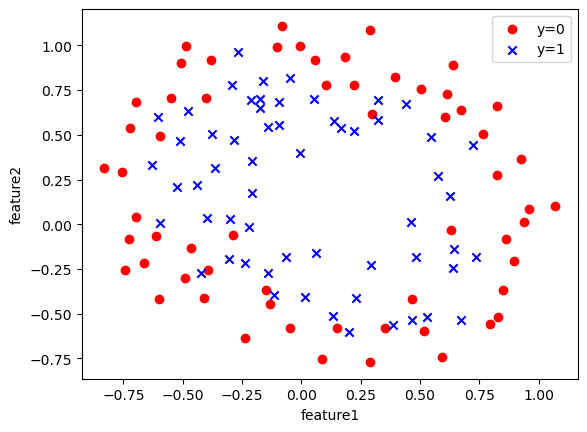

In [ ]:
plt.figure()
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],marker='o',c='r',label='y=0')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],marker='x',c='b',label='y=1')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
-plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 

In [24]:
model = Pipeline([
    ("poly", PolynomialFeatures(degree=6,include_bias=False)),
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=10000))
    ])


In [25]:
model.fit(x_train,y_train)

,steps,"[('poly', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,6
,interaction_only,False
,include_bias,False
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [30]:
print(f'Accuracy: {model.score(x_train,y_train)*100}')

Accuracy: 83.05084745762711


In [34]:
x_min,x_max = x_train[:,0].min()-0.5, x_train[:,0].max()+0.5
y_min,y_max = x_train[:,1].min()-0.5, x_train[:,1].max()+0.5

xx,yy = np.meshgrid(np.linspace(x_min,x_max,300), np.linspace(y_min,y_max,300))
grid_mapped = np.c_[xx.ravel(), yy.ravel()]   # use np.c_[...] (bracket indexing) to stack columns
probs = model.predict_proba(grid_mapped)[:,1]
probs = probs.reshape(xx.shape)

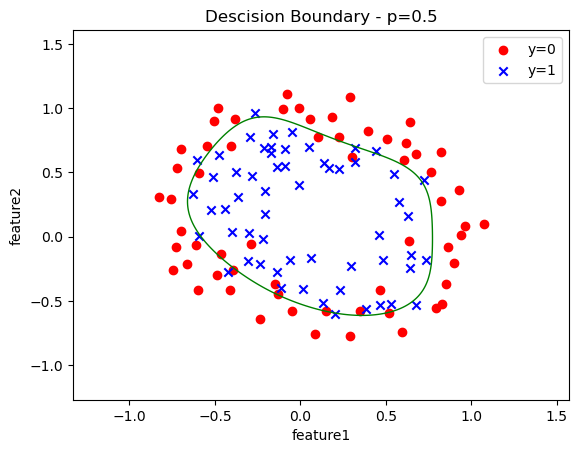

In [41]:
plt.figure()

plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],marker='o',c='red',label='y=0')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],marker='x',c='blue',label='y=1')
plt.contour(xx,yy,probs,colors='green',levels=[0.5],linewidths=1)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.title('Descision Boundary - p=0.5')
plt.show()